<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Logs_data6_model_training_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# Data from Excel
file_path = '/content/logs_5_xls.xlsx'
data = pd.read_excel(file_path)

In [3]:
X = data.drop('Grade', axis=1).values
y = data['Grade'].values

In [4]:
# Ensure target values are 0 or 1
y = (y == 1).astype(float)

In [5]:
#  Preprocess Data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [8]:
# Define the Model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))
        return x


In [9]:
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)

In [10]:
#  Define Loss Function and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
# Train the Model
num_epochs = 100
training_losses = []
validation_losses = []

In [12]:
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/100], Loss: 0.6228, Val Loss: 0.5697
Epoch [20/100], Loss: 0.4805, Val Loss: 0.3980
Epoch [30/100], Loss: 0.3403, Val Loss: 0.2463
Epoch [40/100], Loss: 0.2168, Val Loss: 0.1392
Epoch [50/100], Loss: 0.1271, Val Loss: 0.0748
Epoch [60/100], Loss: 0.0726, Val Loss: 0.0407
Epoch [70/100], Loss: 0.0431, Val Loss: 0.0237
Epoch [80/100], Loss: 0.0276, Val Loss: 0.0151
Epoch [90/100], Loss: 0.0191, Val Loss: 0.0105
Epoch [100/100], Loss: 0.0140, Val Loss: 0.0078


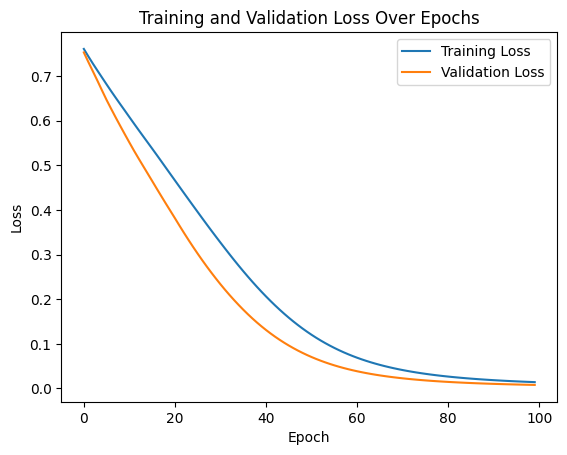

In [13]:
# Plot the losses
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [15]:
# Evaluate the Model
model.eval()
with torch.no_grad():
    y_predicted = model(X_test).round()

In [16]:
# Check unique values in y_predicted
unique_values = y_predicted.unique()
print(f'Unique values in predictions: {unique_values}')

Unique values in predictions: tensor([0.])


In [17]:
# Ensure y_test is correctly shaped for sklearn's classification_report
y_test_flat = y_test.flatten()

In [18]:
# If only one class is predicted, avoid using classification_report
if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted. Cannot generate classification report.')
else:
    print(classification_report(y_test_flat, y_predicted, target_names=['class 0', 'class 1']))

Only one class (0.0) predicted. Cannot generate classification report.


In [19]:
# Check Data Distribution
print(pd.Series(y_train.numpy().flatten()).value_counts())

0.0    13
Name: count, dtype: int64


In [20]:
# Inspect Model Predictions
with torch.no_grad():
    raw_outputs = model(X_test)
    print(raw_outputs[:10])  # Print the first 10 outputs

tensor([[4.3918e-03],
        [1.1135e-02],
        [4.5070e-05],
        [1.5400e-02]])


In [21]:
# djust Classification Threshold
threshold = 0.3  # Adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.3: tensor([0.])
Only one class (0.0) predicted with threshold 0.3.


In [22]:
# Review and Improve Model Architecture
class ImprovedNN(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.sigmoid(self.layer4(x))
        return x

model = ImprovedNN(input_dim)

Epoch [10/100], Loss: 0.5021, Val Loss: 0.4016
Epoch [20/100], Loss: 0.2315, Val Loss: 0.1371
Epoch [30/100], Loss: 0.0488, Val Loss: 0.0243
Epoch [40/100], Loss: 0.0080, Val Loss: 0.0042
Epoch [50/100], Loss: 0.0022, Val Loss: 0.0013
Epoch [60/100], Loss: 0.0011, Val Loss: 0.0007
Epoch [70/100], Loss: 0.0008, Val Loss: 0.0005
Epoch [80/100], Loss: 0.0006, Val Loss: 0.0004
Epoch [90/100], Loss: 0.0005, Val Loss: 0.0003
Epoch [100/100], Loss: 0.0005, Val Loss: 0.0003


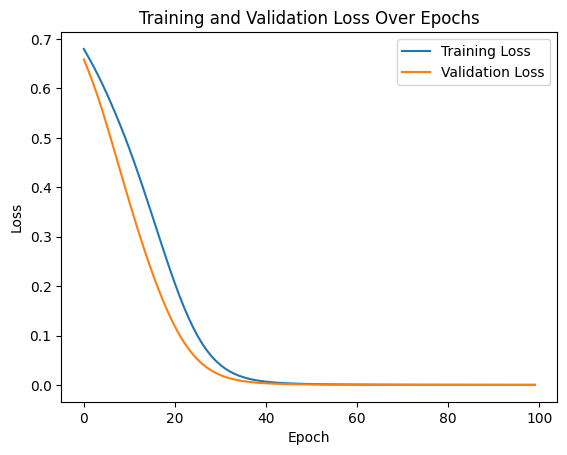

Raw outputs (first 10): tensor([4.7647e-05, 3.8488e-04, 4.4916e-10, 8.1370e-04])
Unique values in predictions with threshold 0.3: tensor([0.])
Only one class (0.0) predicted with threshold 0.3.


In [25]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 1: Load Data from Excel
file_path = '/content/logs_5_xls.xlsx'
data = pd.read_excel(file_path)

# Assuming your Excel file has columns 'features' and 'target'
X = data.drop('Grade', axis=1).values
y = data['Grade'].values

# Ensure target values are 0 or 1
y = (y == 1).astype(float)

# Step 2: Preprocess Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Step 3: Define the Model
class ImprovedNN(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.sigmoid(self.layer4(x))
        return x

input_dim = X_train.shape[1]
model = ImprovedNN(input_dim)

# Step 4: Define Loss Function and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 5: Train the Model
num_epochs = 100
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Step 6: Evaluate the Model
model.eval()
with torch.no_grad():
    raw_outputs = model(X_test)
    print(f'Raw outputs (first 10): {raw_outputs[:10].flatten()}')

    # Adjust threshold if necessary
    threshold = 0.3
    y_predicted = (raw_outputs > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

    y_test_flat = y_test.flatten()
    if len(unique_values) == 1:
        print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
    else:
        print(classification_report(y_test_flat, y_predicted, target_names=['class 0', 'class 1']))

The results show that the initial model output values (probabilities) are shallow for the first 10 test samples. These low values are well below the default threshold of 0.5 (and even the adjusted threshold of 0.3), which results in all forecasts being classified as class 0.